In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

train_data = pd.read_csv("house_train.csv")
test_data = pd.read_csv("house_test.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data.shape

(1460, 81)

In [4]:
test_data.shape

(1459, 80)

In [5]:

train_ID = train_data['Id']
test_ID = test_data['Id']

#Dropping Ids
train_data.drop("Id", axis = 1, inplace = True)
test_data.drop("Id", axis = 1, inplace = True)

In [6]:
#combine training data and test data to find missing values
all_df = pd.concat((train_data.loc[:,'MSSubClass':'SaleCondition'], test_data.loc[:,'MSSubClass':'SaleCondition']), axis=0,ignore_index=True)

In [7]:
all_df.shape

(2919, 79)

In [8]:
# find data types
quantitative = [f for f in all_df.columns if all_df.dtypes[f] != 'object']
qualitative = [f for f in all_df.columns if all_df.dtypes[f] == 'object']

print("quantitative: {}, qualitative: {}" .format (len(quantitative),len(qualitative)))


quantitative: 36, qualitative: 43


In [9]:
# find missing values
missing = all_df.isnull().sum()
missing.sort_values(inplace=True,ascending=False)
missing = missing[missing > 0]
percentage = (all_df[missing.index].isnull().sum()/all_df[missing.index].isnull().count()).sort_values()


In [10]:
# show missing values
missing_data = pd.concat([missing, percentage], axis=1, keys=['Total', 'Percent'])
missing_data.sort_values('Total',ascending=False,inplace=True)
missing_data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


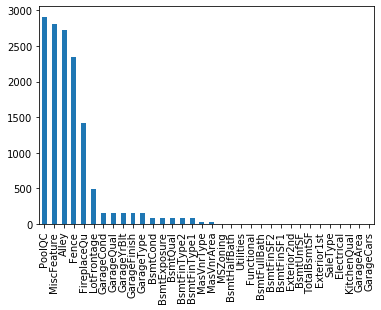

In [11]:
missing.plot.bar()

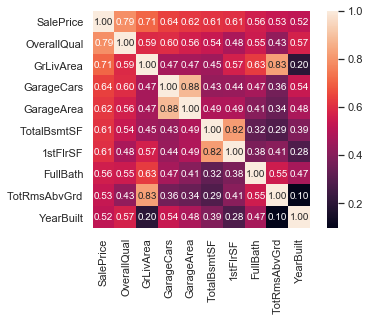

Index(['GarageCars', 'TotalBsmtSF', 'GarageArea'], dtype='object')

In [12]:
# correlation matrix

corrmat=train_data.corr()

k = 10 #number of variables for heatmap find most 10 correlated variables
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
#find the ones that have missing values and are in the correlation matrix
missing_data.index.intersection(cols)

In [13]:
# drop missing values greater than 1
all_df = all_df.drop((missing_data[missing_data['Total'] > 1]).index,1)

In [14]:
all_df.shape

(2919, 56)

In [15]:
quantitative = [f for f in all_df.columns if all_df.dtypes[f] != 'object']
qualitative = [f for f in all_df.columns if all_df.dtypes[f] == 'object']
print("quantitative: {}, qualitative: {}" .format (len(quantitative),len(qualitative)))

quantitative: 31, qualitative: 25


In [16]:
all_df.isnull().sum()

MSSubClass       0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       1
GarageArea       1
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold      

In [18]:
all_df=all_df.ffill() # fill the missing values

In [19]:
all_df.isnull().sum()

MSSubClass       0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold      

In [21]:
 # Need to convert some of the features here to string type for dummy variables later
for f in all_df.columns:
    if all_df.dtypes[f] != 'object':
        print(f)

MSSubClass
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold


In [22]:
# Convert object type into str type for dummy variables
for f in all_df.columns:
    if all_df.dtypes[f] == 'object':
        all_df[f]=all_df[f].astype(str)
        

In [23]:
#convert some of the features here to string type for dummy variables
all_df['MSSubClass']=all_df['MSSubClass'].astype(str)
all_df['OverallQual']=all_df['OverallQual'].astype(str)
all_df['OverallCond']=all_df['OverallCond'].astype(str)
all_df['YearBuilt']=all_df['YearBuilt'].astype(str)
all_df['YearRemodAdd']=all_df['YearRemodAdd'].astype(str)
all_df['FullBath']=all_df['FullBath'].astype(str)
all_df['HalfBath']=all_df['HalfBath'].astype(str)
all_df['MiscVal']=all_df['MiscVal'].astype(str)
all_df['MoSold']=all_df['MoSold'].astype(str)
all_df['YrSold']=all_df['YrSold'].astype(str)




In [24]:
# log some features to make it normally distributed
logfeatures = ['GrLivArea','1stFlrSF','2ndFlrSF','LotArea','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF']

for logfeature in logfeatures:
    all_df[logfeature] = np.log1p(all_df[logfeature].values)

In [25]:
all_df=pd.get_dummies(all_df).reset_index(drop=True)

In [26]:
all_df.shape

(2919, 471)

In [27]:
# Split the data back to train and test test with feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_index=train_data.index
test_index=list(set(all_df.index).difference(set(train_data.index)))

X_train=all_df.iloc[train_index]
X_test=all_df.iloc[test_index]

y_train=np.log(train_data.SalePrice) # log y_train

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train.shape

(1460, 471)

In [29]:
X_test.shape

(1459, 471)

In [30]:
y_train.shape

(1460,)

In [32]:
X_train.shape

(1460, 471)

In [33]:
X_test.shape

(1459, 471)

In [34]:

from sklearn.linear_model import ElasticNet,Lasso
from sklearn.model_selection import KFold,GridSearchCV
ent = ElasticNet(alpha=0.5,max_iter=5000,l1_ratio=0.4)
ent.fit(X_train,y_train)
y_pred=ent.predict(X_test)


In [35]:
param_grid = {"max_iter" :[500,1000,3000,5000],
                      "alpha": [0.5,0.6,0.7,0.8,0.9,1],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}
grid_search = GridSearchCV(estimator = ent,
                           param_grid = param_grid,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'alpha': 0.5, 'l1_ratio': 0.0, 'max_iter': 1000}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.820005980106611, tolerance: 0.02328006589886511
  positive)


In [36]:
final_model = grid_search.best_estimator_

y_pred = final_model.predict(X_test)

In [38]:
pd.DataFrame({'Id':test_ID, 'SalePrice':np.exp(y_pred)}).set_index('Id').to_csv('House_sub.csv')

In [39]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = grid_search.best_estimator_, X = X_train, y = y_train, cv = 5)
print('Mean Trainning set accuracy',accuracies.mean())
print('Mean Trainning set std',accuracies.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.867106635872037, tolerance: 0.01891283972369289
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.938413043200386, tolerance: 0.018002422128285206
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.378610077668203, tolerance: 0.01837384809099904
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

Mean Trainning set accuracy 0.8743283945192537
Mean Trainning set std 0.018843177193310752


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.395975794393765, tolerance: 0.018810859187734494
  positive)
